# Librairies

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Dataset MNIST

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000, 10)


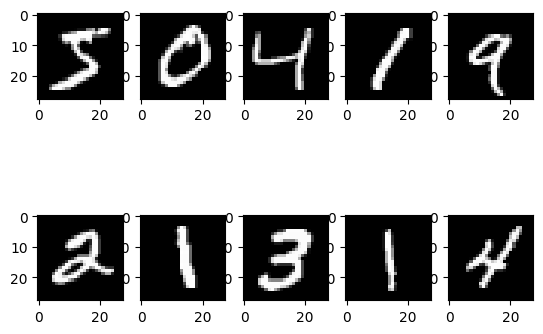

In [2]:
# import du dataset
(img_train, label_train),(img_test,label_test) = keras.datasets.mnist.load_data()
# conversion des images en float
img_train=img_train/255.0
img_test=img_test/255.0
# conversion des labels en vecteurs de sortie avec to_categorical (avec 10 classes)
output_train=keras.utils.to_categorical(label_train, num_classes=10)
output_test=keras.utils.to_categorical(label_test, num_classes=10)
# on vérifie la taille de notre dataset
print(img_train.shape)
print(output_train.shape)
# on affiche un échantillon d'images
for i in range(10):
 plt.subplot(2,5,i+1)
 plt.imshow(img_train[i], cmap='gray')
plt.show()

In [3]:
model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(20, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='sigmoid'))

# Afficher la structure
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │          15,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,910 (62.15 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

> Remarques et obervations

Flatten works converting Matrix to single array.



**Compiler le réseau**

In [4]:
loss = keras.losses.MeanSquaredError()
optim = keras.optimizers.SGD(learning_rate=0.5)

model.compile(loss=loss, optimizer=optim, metrics=["accuracy"])

**Entrainement du réseau**



In [5]:
model.fit(img_train, output_train, batch_size=1, epochs=20, shuffle= True, verbose=2)

Epoch 1/20
60000/60000 - 70s - 1ms/step - accuracy: 0.8893 - loss: 0.0187
Epoch 2/20
60000/60000 - 66s - 1ms/step - accuracy: 0.9307 - loss: 0.0114
Epoch 3/20
60000/60000 - 65s - 1ms/step - accuracy: 0.9384 - loss: 0.0102
Epoch 4/20
60000/60000 - 65s - 1ms/step - accuracy: 0.9433 - loss: 0.0095
Epoch 5/20
60000/60000 - 83s - 1ms/step - accuracy: 0.9463 - loss: 0.0090
Epoch 6/20
60000/60000 - 65s - 1ms/step - accuracy: 0.9492 - loss: 0.0086
Epoch 7/20
60000/60000 - 85s - 1ms/step - accuracy: 0.9510 - loss: 0.0084
Epoch 8/20
60000/60000 - 79s - 1ms/step - accuracy: 0.9531 - loss: 0.0082
Epoch 9/20
60000/60000 - 83s - 1ms/step - accuracy: 0.9544 - loss: 0.0079
Epoch 10/20
60000/60000 - 66s - 1ms/step - accuracy: 0.9557 - loss: 0.0077
Epoch 11/20
60000/60000 - 66s - 1ms/step - accuracy: 0.9567 - loss: 0.0075
Epoch 12/20
60000/60000 - 82s - 1ms/step - accuracy: 0.9576 - loss: 0.0074
Epoch 13/20
60000/60000 - 66s - 1ms/step - accuracy: 0.9583 - loss: 0.0072
Epoch 14/20
60000/60000 - 83s - 1m

In [6]:
model.evaluate(img_test,output_test, batch_size=1, verbose=2)

10000/10000 - 11s - 1ms/step - accuracy: 0.9493 - loss: 0.0088


[0.008800952695310116, 0.9492999911308289]

On notera que le résultat est un peu plus faible que sur notre implémentation précédente en Java :

avec java, accuracy = 0.96%
avec python, accuracy = 0.95%

In [7]:
for i in range(50):
  output=model.predict(img_test[i:i+1,:,:])
print(label_test[i]," , ",output.argmax())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━